INTODUCTION

This dataset contains financial data for 1,000 companies, including their spending on R&D, administration, and marketing, along with their location (state) and profit. It can be used to analyze the impact of different expenditures on company profitability.

IMPORT LIBARIES AND LOAD DATASET

In [1]:
#import the labaries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score


#import dataset
df=pd.read_csv(r"C:\Data Science\data_set\1000_Companies.csv")
print(df.head(10))

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
5  131876.90        99814.71        362861.36    New York  156991.12
6  134615.46       147198.87        127716.82  California  156122.51
7  130298.13       145530.06        323876.68     Florida  155752.60
8  120542.52       148718.95        311613.29    New York  152211.77
9  123334.88       108679.17        304981.62  California  149759.96


DATA CLEANING

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [3]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
#find unique vlaues on state
unique_states=df['State'].unique()
print(unique_states)

['New York' 'California' 'Florida']


In [7]:
le=LabelEncoder()
df['State']=le.fit_transform(df['State'])

EXTRACTING INDEPENDENT AND DEPENDENNT VARIABLES

In [8]:
#split the dataset 
x=df[['R&D Spend','Administration','Marketing Spend','State']]
x=pd.DataFrame(x)
y=df['Profit']
y=pd.DataFrame(y)

DATA VISUALIZATION BY FINDING CORRELATION BETWEEN THE DATA

                 R&D Spend  Administration  Marketing Spend     State  \
R&D Spend         1.000000        0.338852         0.834919  0.176761   
Administration    0.338852        1.000000         0.122405  0.050652   
Marketing Spend   0.834919        0.122405         1.000000  0.148626   
State             0.176761        0.050652         0.148626  1.000000   
Profit            0.986730        0.310740         0.848022  0.174390   

                   Profit  
R&D Spend        0.986730  
Administration   0.310740  
Marketing Spend  0.848022  
State            0.174390  
Profit           1.000000  


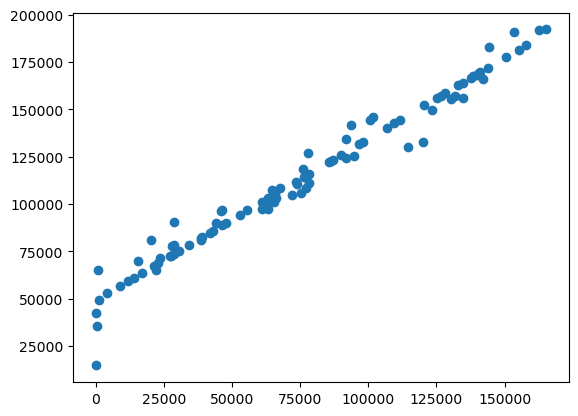

In [9]:
#finding the corelation and graph plotting 
cor=df.head(100)[['R&D Spend','Administration','Marketing Spend','State','Profit']].corr()
print(cor)
plt.scatter(df.head(100)['R&D Spend'],df.head(100)['Profit'])
plt.show()

SPLITING DATA INTO TRAIN AND TEST DATA

In [10]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=34)

MODEL BULIDING AND EVALUATE PREDICTIONS

LINEAR REGRESSION

In [11]:
#create linear regression model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
#make prediction 
y_pred=model.predict(x_test)
print(y_test)
print(y_pred)


           Profit
430  114839.81770
972  161076.62960
395  175747.37530
310  180684.32520
130  129804.43970
..            ...
776  133019.13810
316  159514.13070
974  141344.20750
666   95226.99644
323  134979.73680

[200 rows x 1 columns]
[[114946.66105946]
 [161759.8153638 ]
 [176699.57037546]
 [181611.92121911]
 [130097.81717908]
 [126774.36142448]
 [177632.68749174]
 [128526.57675807]
 [103036.07971335]
 [ 65419.68031455]
 [127169.48577527]
 [ 98679.32805984]
 [ 94519.8792737 ]
 [ 64451.45647838]
 [135164.99225623]
 [143325.34650399]
 [ 80401.3082445 ]
 [128555.2731408 ]
 [ 75591.02036892]
 [ 80183.8524469 ]
 [126218.91649507]
 [175213.09410533]
 [ 97692.47959681]
 [169539.95182271]
 [172466.90927512]
 [ 52430.00957491]
 [ 94230.98920752]
 [ 68287.11018063]
 [107028.99906176]
 [159907.97859728]
 [ 68165.00029968]
 [ 76275.18802056]
 [172804.23584182]
 [ 75768.68891171]
 [156804.57341007]
 [ 51324.61605183]
 [ 56932.3064524 ]
 [ 76966.78433405]
 [105066.95908612]
 [113991.25800968]


In [13]:
#calculate evaluation metrics
print('mean absloute error:',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


mean absloute error: 1754.1683513807168
mean squared error: 49236222.770218916
root mean squared error: 7016.85276817313


In [14]:
#check the accuracy of the model
accuracy=r2_score(y_test,y_pred)
print("accuracy is",accuracy*100,"%")

accuracy is 97.00840968527365 %


SUMMARY

This project aimed to predict the profitability of the financial data.inculiding R&d,administration,and  marketing.. this multi linear regression model achieved 97% accuracy on profit